<a href="https://colab.research.google.com/github/Hexinator12/ML_Project/blob/main/Music_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the data
file_path = "/content/ex.csv"
music_data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(music_data.head())

          Song-Name                                    Singer/Artists  \
0       Aankh Marey               Kumar Sanu, Mika Singh, Neha Kakkar   
1         Coca Cola                          Neha Kakkar, Tony Kakkar   
2  Apna Time Aayega                                     Ranveer Singh   
3            Mungda             Jyotica Tangri, Shaan, Subhro Ganguly   
4          Tere Bin  Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi   

                    Genre    Album/Movie User-Rating  
0          BollywoodDance         Simmba      8.8/10  
1  BollywoodDanceRomantic    Luka Chuppi      9.0/10  
2          BollywoodDance      Gully Boy      9.7/10  
3          BollywoodDance  Total Dhamaal      9.1/10  
4       BollywoodRomantic         Simmba      9.2/10  


In [ ]:
music_data.head()

,Song-Name,Singer/Artists,Genre,Album/Movie,User-Rating
0,Aankh Marey,"Kumar Sanu, Mika Singh, Neha Kakkar",BollywoodDance,Simmba,8.8/10
1,Coca Cola,"Neha Kakkar, Tony Kakkar",BollywoodDanceRomantic,Luka Chuppi,9.0/10
2,Apna Time Aayega,Ranveer Singh,BollywoodDance,Gully Boy,9.7/10
3,Mungda,"Jyotica Tangri, Shaan, Subhro Ganguly",BollywoodDance,Total Dhamaal,9.1/10
4,Tere Bin,"Asees Kaur, Rahat Fateh Ali Khan, Tanishk Bagchi",BollywoodRomantic,Simmba,9.2/10


In [ ]:
music_data.shape

(2420, 5)

In [ ]:
# EDA
print(music_data.describe())
print(music_data.info())

       Song-Name Singer/Artists           Genre Album/Movie User-Rating
count       2420           2410            2420        2417        2420
unique      2337           1214              21         902          40
top        Naina  Mohammed Rafi  BollywoodDance      Devdas      9.4/10
freq           3             55            1228          10         281
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Song-Name       2420 non-null   object
 1   Singer/Artists  2410 non-null   object
 2   Genre           2420 non-null   object
 3   Album/Movie     2417 non-null   object
 4   User-Rating     2420 non-null   object
dtypes: object(5)
memory usage: 94.7+ KB
None


In [ ]:
print("\nMissing Values:")
print(music_data.isnull().sum())


Missing Values:
Song-Name          0
Singer/Artists    10
Genre              0
Album/Movie        3
User-Rating        0
dtype: int64


In [ ]:
print("\nFrequency Distribution of Genre:")
print(music_data['Genre'].value_counts())


Frequency Distribution of Genre:
BollywoodDance                         1228
BollywoodRomantic                       601
BollywoodSad                            297
Bollywood                               102
BollywoodDanceRomantic                   53
BollywoodRomanticSad                     29
BollywoodDevotional                      25
BollywoodPatriotic                       20
BollywoodMotivational                    19
BollywoodRomance                         14
BollywoodRomanticSensual                  8
BollywoodSensual                          7
BollywoodDanceSad                         4
BollywoodDancePatriotic                   3
BollywoodRomanticSadSensual               2
BollywoodMotivationalPatriotic            2
BollywoodDanceSensual                     2
BollywoodDevotionalSad                    1
BollywoodDanceMotivationalPatriotic       1
BollywoodDanceRomance                     1
BollywoodPatrioticSad                     1
Name: Genre, dtype: int64


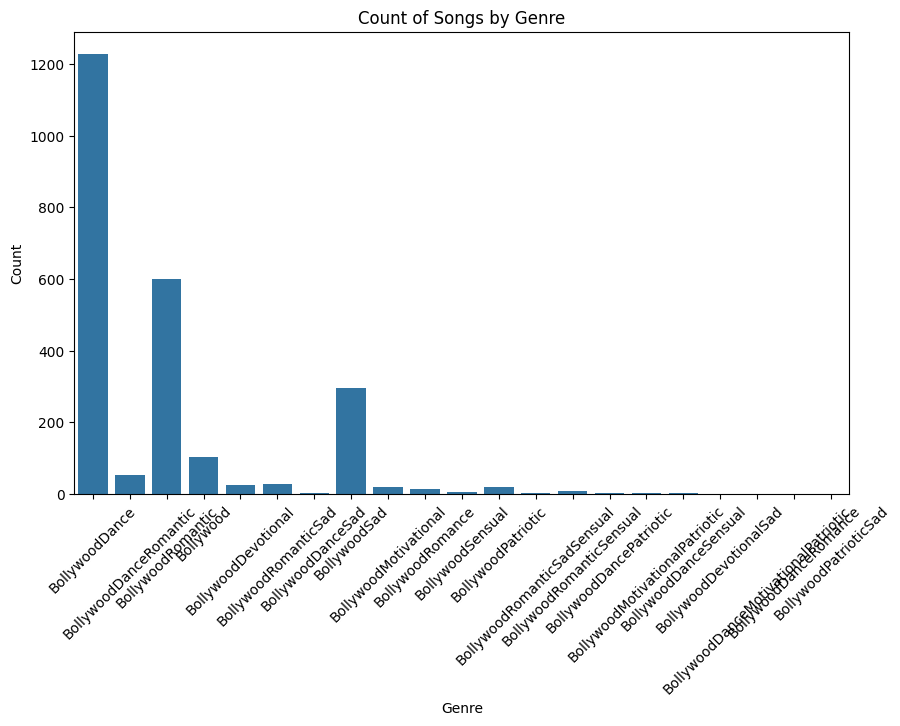

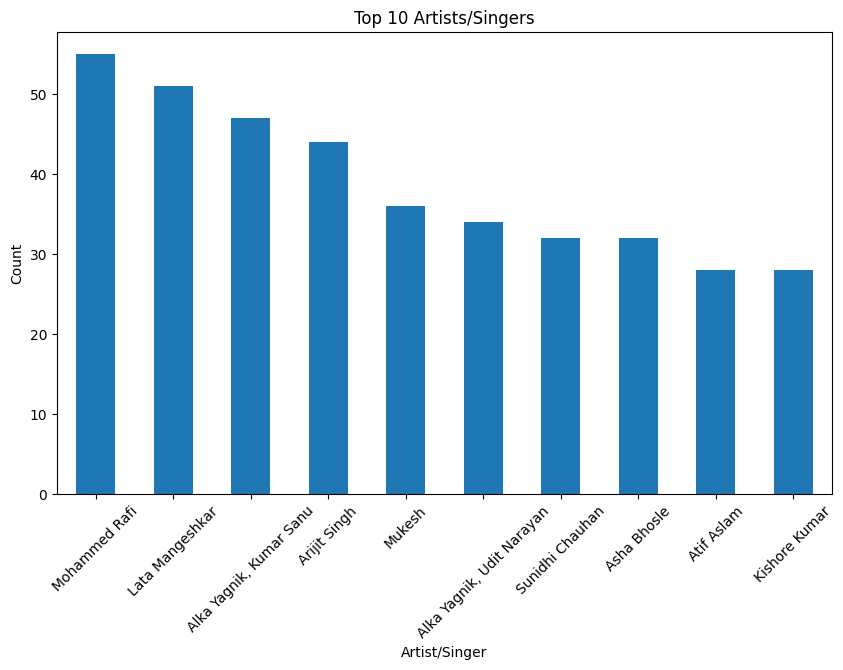

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  # Import matplotlib.pyplot module

file_path = "/content/ex.csv"
music_data = pd.read_csv(file_path)

music_data['Numerical-Rating'] = music_data['User-Rating'].str.split('/').str[0]
music_data['Numerical-Rating'] = pd.to_numeric(music_data['Numerical-Rating'], errors='coerce')

music_data = music_data.dropna(subset=['Numerical-Rating'])

# Plot count plot for Genre
plt.figure(figsize=(10, 6))
sns.countplot(data=music_data, x='Genre')
plt.title('Count of Songs by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

top_artists = music_data['Singer/Artists'].value_counts().nlargest(10)
plt.figure(figsize=(10, 6))
top_artists.plot(kind='bar')
plt.title('Top 10 Artists/Singers')
plt.xlabel('Artist/Singer')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Preprocess text columns for content-based filtering
text_cols = ['Singer/Artists', 'Genre', 'Album/Movie']
for col in text_cols:
    music_data[col] = music_data[col].fillna('')  # Fill missing values with empty string

# Combine text columns into a single feature
music_data['feature'] = music_data['Singer/Artists'] + ' ' + music_data['Genre'] + ' ' + music_data['Album/Movie']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(music_data['feature'])

# Compute cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def recommend_content_based(song_name, cosine_sim=cosine_sim):
    idx = music_data[music_data['Song-Name'] == song_name].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Top 10 similar songs
    song_indices = [i[0] for i in sim_scores]
    return music_data['Song-Name'].iloc[song_indices]

In [ ]:
# Combine text columns into a single feature
music_data['features'] = music_data['Singer/Artists'] + ' ' + music_data['Genre'] + ' ' + music_data['Album/Movie']

# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(music_data['features'])

In [ ]:
# Content-Based Filtering Recommendation
input_song = 'Jogi'
recommended_songs_content_based = recommend_content_based(input_song)
print("Recommended Songs (Content-Based):")
print(recommended_songs_content_based)

Recommended Songs (Content-Based):
60                  Pallo Latke
265        Main Hoon Saath Tere
310                Main Adhoora
351    Tu Banja Gali Benaras Ki
95          Mera Intkam Dekhegi
83              Naino Ne Bandhi
671                     Mehfooz
874                 De De Jagah
169                    Mehbooba
155       Sleepy Sleepy Akiyaan
Name: Song-Name, dtype: object
